# Task
Find the percentage of major colors in an image.

## Libraries
- pillow (https://pypi.org/project/pillow/) : The Python Imaging Library adds image processing capabilities to your Python interpreter.
- numpy (https://numpy.org/doc/stable/) : NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

### Approach
We first write the implementation for one image and then generalize it as a function to be run across any given image

#### At a high level
1. Load Image: The image is loaded and converted to an RGB array.
2. K-means Clustering:
3. Histogram Calculation: After clustering, we calculate how many points (pixels) are in each cluster and determine the percentages for the top k clusters.

### Importing packages and reading the image

In [74]:
import subprocess
import sys

def install_package(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

try:
    import matplotlib
except ImportError:
    print("Matplotlib is not installed. Installing now...")
    install_package("matplotlib")
    import matplotlib  # Import after installation

print("Matplotlib is installed and ready to use.")

Matplotlib is installed and ready to use.


In [75]:
# Importing libraries
from PIL import Image, ImageCms
import numpy as np
import random
import matplotlib.pyplot as plt

In [270]:
# Defining Variables

img_location="../data/images/1000_F_197136667_bQFpFJSEK8wQWgibV5QOa2X6i8FNZns1.jpg"
k_means_clusters=5
k_means_iteration=10

In [271]:
im = Image.open(img_location)

# Printing some information about the image 
print(im.format, im.size, im.mode)

JPEG (1000, 667) RGB


In [272]:
# We now convert the RGB values of the image into a numpy array for further processing
img_arr = np.array(im)
print(img_arr)

[[[208 199   0]
  [209 200   1]
  [212 200   0]
  ...
  [ 56  43  53]
  [126  91  87]
  [185 131 121]]

 [[208 199   0]
  [209 200   0]
  [211 202   1]
  ...
  [119  84  88]
  [175 128 122]
  [186 139 129]]

 [[208 201   0]
  [210 201   0]
  [211 202   1]
  ...
  [181 130 126]
  [192 139 131]
  [188 144 131]]

 ...

 [[  0 100 168]
  [  0 100 168]
  [  0 101 171]
  ...
  [  0 193 130]
  [  1 195 134]
  [  2 197 137]]

 [[  1 100 168]
  [  1 100 168]
  [  0 100 170]
  ...
  [  0 192 127]
  [  0 194 133]
  [  2 196 136]]

 [[  2 101 169]
  [  1 100 168]
  [  0  98 169]
  ...
  [  0 192 125]
  [  0 193 130]
  [  1 195 132]]]


### Defining Similarity in Pixels

#### In this case where we want to group the pixels by similarity of color, how do we define the measure of similarity ?

In the context of clustering pixels by color similarity in an image, the measure of similarity often relies on a distance metric in a color space. Here’s a basic overview of how to define and use these similarity measures:

#### 1. **Color Space**
Choosing an appropriate color space is crucial. Common color spaces include:
- **RGB (Red, Green, Blue)**: Directly measures distances between color vectors but may not align well with human perception of color differences.
- **Lab (L * a * b)**: Designed to be more perceptually uniform, meaning that the same amount of numerical change in these values corresponds to about the same amount of visually perceived change.
- **HSV (Hue, Saturation, Value)**: Useful for applications where color hue is more important than the luminance (brightness).

#### 2. **Distance Metric**
Once a color space is selected, you define the similarity of colors using a distance metric:
- **Euclidean Distance**: This is the most common distance metric used in color clustering, especially in RGB space. It calculates the root of square differences between the corresponding components of two colors. In RGB, the Euclidean distance between two colors \(c1\) and \(c2\) with components \( (r1, g1, b1) \) and \( (r2, g2, b2) \)
- **CIE76 Distance in Lab Space**: If using Lab space, the CIE76 formula (a simple Euclidean distance in Lab space) is often used. It is more aligned with human vision. [Learn More about the Delta E formula](https://zschuessler.github.io/DeltaE/learn/)
- **Cosine Similarity**: This measures the cosine of the angle between two vectors (used less commonly for color spaces but useful for normalization).

#### 3. **Normalization**
In some cases, especially in RGB space, normalization of color values (scaling them to a range from 0 to 1) can help reduce the bias due to varying scales of color components.

#### 4. **Perceptual Importance**
In some applications, certain color components might carry more perceptual importance. For instance, in HSV, hue might be more important than saturation or value. In such cases, custom weighted distance metrics can be used.

#### Practical Advice:
For practical implementations involving image processing, converting your image data into Lab or HSV color space and then applying a clustering algorithm like k-means with Euclidean distance might give more meaningful results in terms of human color perception compared to straightforward RGB clustering. If using Python libraries like OpenCV or Pillow, these conversions are straightforward and well-supported.

### Converting the image to Lab color space

In [273]:
# Specify standard profiles for the conversion
srgb_profile = ImageCms.createProfile("sRGB")
lab_profile  = ImageCms.createProfile("LAB")

# Build a transform to convert from RGB to Lab
rgb2lab_transform = ImageCms.buildTransformFromOpenProfiles(srgb_profile, lab_profile, "RGB", "LAB")

# Apply transform
lab_image = ImageCms.applyTransform(im, rgb2lab_transform)

# lab_image now contains the image in the Lab color space
lab_img_arr = np.array(lab_image)
print(lab_img_arr)
print(np.shape(lab_img_arr))

[[[202 247  78]
  [202 247  79]
  [203 248  79]
  ...
  [ 49   8 252]
  [108  14   8]
  [153  20  14]]

 [[202 247  78]
  [202 247  79]
  [204 247  79]
  ...
  [101  15   4]
  [148  18  11]
  [159  17  13]]

 [[203 246  79]
  [203 247  79]
  [204 247  79]
  ...
  [152  20  10]
  [161  20  13]
  [163  16  14]]

 ...

 [[103 252 212]
  [103 252 212]
  [104 252 211]
  ...
  [176 202  20]
  [178 202  19]
  [180 202  18]]

 [[103 252 212]
  [103 252 212]
  [103 252 211]
  ...
  [175 202  21]
  [177 202  19]
  [179 202  18]]

 [[104 252 212]
  [103 252 212]
  [102 253 210]
  ...
  [175 202  22]
  [176 202  20]
  [178 202  20]]]
(667, 1000, 3)


The values you're seeing in the array—\[68, 242, 24\], \[59, 242, 24\], \[61, 242, 24\]—are indeed a representation of colors in the Lab color space, but they are encoded in a specific way that PIL/Pillow uses to fit the Lab color model into an 8-bit per channel format. This is often necessary because typical image formats and processing libraries are designed to handle 8-bit channels.

### Understanding the Encoding:

1. **L\* component**: It ranges from 0 to 100 in theory, but for 8-bit encoding, it is scaled to fit the 0-255 range. Thus, an L\* value in this encoding can be converted back to the standard range by multiplying by 100/255.

2. **a\* and b\* components**: These components typically range from about -128 to +127. However, to store these values in an 8-bit format (which only allows values from 0 to 255), an offset of 128 is usually added. Therefore, the actual a\* and b\* values can be recovered by subtracting 128 from the stored values.

### Decoding Lab Values:

To interpret the Lab values correctly, you can convert them from their 8-bit encoded form back to the typical Lab range:

```python
import numpy as np

# Example LAB values from your output
lab_encoded = np.array([[68, 242, 24], [59, 242, 24], [61, 242, 24]])

# Convert L from 0-255 scale to 0-100 scale
L = (lab_encoded[:, 0] * 100.0) / 255.0

# Convert a and b from 0-255 scale to -128 to +127 scale
a = lab_encoded[:, 1] - 128
b = lab_encoded[:, 2] - 128

# Combine and print the decoded LAB values
lab_decoded = np.column_stack((L, a, b))
print(lab_decoded)
```

This script will show you the Lab values in a more traditional format that reflects how these values are typically understood in color science. This conversion is essential for proper interpretation and analysis, especially if you're comparing colors, performing color corrections, or any other task that relies on accurate color metrics.

For calculating the similarity between two LAB space points, we will be using the CIE76 Distance in Lab Space: If using Lab space, the CIE76 formula (a simple Euclidean distance in Lab space) is often used. It is more aligned with human vision. [Learn More about the Delta E formula](https://zschuessler.github.io/DeltaE/learn/)

Now that we have this aside, let's go ahead and write down the K Means Algorithm that gives us k clusters.

A couple of points to note before we go ahead and implement the K means clustering:

- Since clustering algorithms including kmeans use distance-based measurements to determine the similarity between data points, it’s recommended to standardize the data to have a mean of zero and a standard deviation of one since almost always the features in any dataset would have different units of measurements such as age vs income.
- Given kmeans iterative nature and the random initialization of centroids at the start of the algorithm, different initializations may lead to different clusters since kmeans algorithm may stuck in a local optimum and may not converge to global optimum. Therefore, it’s recommended to run the algorithm using different initializations of centroids and pick the results of the run that that yielded the lower sum of squared distance.

Some comments:
- In our case since we are going to use a custom defined function (CIE76) for calculating the similarity between various points in the LAB Space, we will not have to worry about standardizing the data

**We will for now stick to the lab values generated by the library and worry about converting them to standard lab values later**

### K - Means Clustering

[Reference Link](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a)

Clustering is one of the most common exploratory data analysis technique used to get an intuition about the structure of the data. It can be defined as the task of identifying subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very different. In other words, we try to find homogeneous subgroups within the data such that data points in each cluster are as similar as possible according to a similarity measure such as euclidean-based distance or correlation-based distance. The decision of which similarity measure to use is application-specific.

Unlike supervised learning, clustering is considered an unsupervised learning method since we don’t have the ground truth to compare the output of the clustering algorithm to the true labels to evaluate its performance. We only want to try to investigate the structure of the data by grouping the data points into distinct subgroups.

#### K - means Algorithm
Kmeans algorithm is an iterative algorithm that tries to partition the dataset into `Kpre-defined distinct non-overlapping subgroups` (clusters) where each data point belongs to only one group. It tries to make the **intra-cluster data points as similar as possible** while also **keeping the clusters as different (far) as possible**. It assigns data points to a cluster such that the **sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum**. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

Here's a website where we can play around with multiple points and visualize some K Means clustering in action: https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

##### Expectation Maximization:
The approach `kmeans` follows to solve the problem is called `Expectation-Maximization`. The E-step is assigning the data points to the closest cluster. The M-step is computing the centroid of each cluster. 

#### Simple K - means python implementation

In [274]:
# Testing the initialize_centroids function
pixels = []

# lab_img_arr
pixels = lab_img_arr.reshape((-1,3))

print(pixels)

[[202 247  78]
 [202 247  79]
 [203 248  79]
 ...
 [175 202  22]
 [176 202  20]
 [178 202  20]]


### Note on how reshape works

The `reshape` function in NumPy is a powerful tool that allows you to change the shape of an existing array without changing its data. This means you can rearrange the elements of the array to have a different structure, which is particularly useful in data processing tasks such as image manipulation or when preparing data for machine learning models.

#### Syntax and Basic Usage

The basic syntax of the `reshape` function is:

```python
numpy.reshape(a, newshape)
```

- **`a`**: The array to be reshaped.
- **`newshape`**: The new shape you want the array to have, which must contain the same number of elements as the original array. This can be specified as an integer (if you are reshaping to a one-dimensional array) or as a tuple of integers.

#### How `reshape` Works

When you reshape an array, you are simply changing the "view" of the data in memory. The data itself is not copied or moved; instead, NumPy changes how the data is indexed. This makes reshaping very efficient.

For example, if you have an image stored in a 3D array with dimensions corresponding to height, width, and color channels (e.g., \(100 \times 100 \times 3\) for a 100 by 100 pixel image with RGB values), you can reshape it into a 2D array where each row represents a pixel and each column represents a color channel. This is done as follows:

```python
image_array = numpy.array(...)  # an array with shape (100, 100, 3)
pixels = image_array.reshape((-1, 3))
```

#### Explanation of the Example

- **Original Array**: Suppose `image_array` has a shape of \(100 \times 100 \times 3\). This means the array has 100 rows (each representing the vertical dimension of the image), 100 columns (each representing the horizontal dimension), and 3 layers (each representing the color channels of RGB).
  
- **Reshape to (-1, 3)**: 
  - The `-1` in the reshape function is a placeholder that tells NumPy to calculate the necessary size of this dimension based on the length of the array and the other given dimensions. In this case, it will calculate the size necessary to maintain the same number of total elements in the array.
  - The `3` tells NumPy that we want the inner-most dimension (columns in this 2D view) to have 3 elements, which corresponds to the three color channels.

Effectively, `image_array.reshape((-1, 3))` flattens the image into a 2D array where each row represents a pixel's RGB values. This transformation is often used when you need to process or analyze each pixel individually, as in color clustering with the K-means algorithm.

By using `reshape`, you can efficiently prepare multidimensional data for various analyses without additional computational overhead of data copying.

### K means function

#### Picking first centroids

In [275]:
# Initialize centroids randomly from the dataset
# We start with k_means_clusters centroids
np.random.seed(42)  # for reproducibility

# Picking k random indices from total length
len = pixels.shape[0]

# https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html#numpy-random-choice
random_indices = np.random.choice(len, k_means_clusters, replace=False)

# replaceboolean, optional
# Whether the sample is with or without replacement. 
# Default is True, meaning that a value of a can be selected multiple times.
# Since we set it to false here, all the picked indices will be random

# Picking centroids at these random indices
centroids = pixels[random_indices]
print(centroids)
centroids.shape[0]

[[197 195  29]
 [190 225 221]
 [ 82  10 223]
 [128  50 241]
 [161 236 214]]


5

#### Calculating distances of all pixels from the centroids   

In [276]:
# Create an array to hold distances from each point to each centroid
distance = np.zeros((pixels.shape[0], centroids.shape[0]))

# Calculate the distance from each point to each centroid
for k in range(centroids.shape[0]):
    row_norm = np.linalg.norm(pixels - centroids[k], axis=1)
    distance[:, k] = np.square(row_norm)

#### Calculate Distance:

> `row_norm = numpy.linalg.norm(X - centroids[k], axis=1)`
- Here, (X - centroids[k]) computes the vector difference between each data point in X and the k-th centroid. The norm function from the numpy library (numpy.linalg.norm) then calculates the Euclidean norm (or distance) of these difference vectors.
- axis=1 tells the norm function to operate along the axis 1, i.e., it calculates the norm across each row (each row represents a data point in X).

#### Store Squared Distances:
> `distance[:, k] = np.square(row_norm)`: The distances are squared and stored in the distance array. Squaring the distances is common in K-means to emphasize larger differences and stabilize the clustering convergence, although the square root could also be used if we only need the actual Euclidean distances.

In [277]:
# This matrix represents the distance of each pixel from each of the k_means_clusters centroids
distance

array([[  5130.,  13397.,  82890.,  52934.,  16202.],
       [  5229.,  13624.,  83113.,  53121.,  16443.],
       [  5345.,  13694.,  83829.,  53665.,  16549.],
       ...,
       [116806., 115619.,  48538.,  26682.,  53576.],
       [116283., 115878.,  48509.,  26633.,  53353.],
       [117227., 116850.,  48889.,  26829.,  53417.]])

#### How Distance Affects Clustering

- After computing these distances, each data point is assigned to the nearest centroid. The nearest centroid is the one with the smallest distance to the point.
- This assignment is typically done using:
  `
  closest_clusters = np.argmin(distance, axis=1)
  `
  where `np.argmin` finds the index of the minimum distance for each row in the `distance` matrix, effectively assigning each data point to the closest centroid.

#### Importance of Distance in K-means

Calculating accurate distances is fundamental to the correct functioning of the K-means algorithm. It ensures that each data point is assigned to the most similar cluster, based on the chosen metric (Euclidean distance in this case). The subsequent update of centroids, based on these assignments, then moves each centroid to better represent its cluster, leading to an iterative improvement and refinement of cluster positions until convergence.

This distance computation encapsulates the essence of clustering in K-means: grouping data points based on their similarity, which is quantified here as the inverse of their distance to cluster centers.

In [278]:
closest_clusters = np.argmin(distance, axis=1)
print(closest_clusters)
np.shape(closest_clusters)

[0 0 0 ... 3 3 3]


(667000,)

Here we can see that we have the closest cluster value for each of these pixels

#### Updating the centroids after we have found the distance from all points

Once you have assigned each data point to the nearest centroid in the K-means clustering algorithm, the next step is to update the centroids based on these assignments. This step is crucial for refining the positions of the centroids to better represent the data points clustered around them.

The centroids are updated to be the mean of all points assigned to each centroid's cluster. This process involves calculating the average of the coordinates of all points in each cluster. 

In [279]:
new_centroids = np.zeros((k_means_clusters, pixels.shape[1]))
print(new_centroids)
np.shape(new_centroids)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


(5, 3)

In [280]:
# Using boolen to filter out indices from arrays
closest_clusters == 1

array([False, False, False, ..., False, False, False])

In [281]:
for i in range(k_means_clusters):
    # Select all data points assigned to the ith cluster
    points_in_cluster = pixels[closest_clusters == (i+1)]
    
    # Compute the mean of these points in each dimension
    if points_in_cluster.size > 0:  # Check if the cluster is not empty
        new_centroids[i] = np.mean(points_in_cluster, axis=0)
    else:
        # If a cluster is empty, reinitialize its centroid randomly (optional)
        new_centroids[i] = pixels[np.random.randint(0, pixels.shape[0])]

print(new_centroids)

[[141.00083334 143.15712598 168.62144342]
 [134.40840311  82.77088027 136.09355917]
 [159.1353325  124.2789676   74.90020528]
 [162.98904923 112.50039741 144.81799636]
 [154.          34.          67.        ]]


### Updating centroids iteratively

Now we try performing the above set of actions in a for loop

In [282]:
pixels = img_arr.reshape((-1,3))
pixels

array([[208, 199,   0],
       [209, 200,   1],
       [212, 200,   0],
       ...,
       [  0, 192, 125],
       [  0, 193, 130],
       [  1, 195, 132]], dtype=uint8)

In [283]:
# Picking k random indices from total length
len = pixels.shape[0]
random_indices = np.random.choice(len, k_means_clusters, replace=False)
centroids = pixels[random_indices]

# Create an array to hold distances from each point to each centroid
distance = np.zeros((pixels.shape[0], centroids.shape[0]))

# Updating the centroids 100 times and check for convergence each time
for iteration  in range(10):
    print(f"iteration {iteration}")
    # Calculate the distance from each point to each centroid
    for k in range(centroids.shape[0]):
        row_norm = np.linalg.norm(pixels - centroids[k], axis=1) # Calculating the eucledian distance from each centroid
        distance[:, k] = np.square(row_norm) # Taking square of the euclidian distance from each centroid

    # Finding the closest clusters of each point 
    # based on the current value of centroids
    closest_clusters = np.argmin(distance, axis=1)


    # Creating an empty array to start storing new centroid values
    new_centroids = np.zeros((k_means_clusters, pixels.shape[1]))
    
    for i in range(k_means_clusters):
        # Select all data points assigned to the ith cluster
        points_in_cluster = pixels[closest_clusters == (i+1)]
        
        # Compute the mean of these points in each dimension
        if points_in_cluster.size > 0:  # Check if the cluster is not empty
            new_centroids[i] = np.mean(points_in_cluster, axis=0, dtype='int32')
        else:
            # If a cluster is empty, reinitialize its centroid randomly (optional)
            new_centroids[i] = pixels[np.random.randint(0, pixels.shape[0])]

    # Check for convergence
    if np.allclose(centroids, new_centroids):
        break

    centroids = new_centroids

print("Centroids:\n", centroids)

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
Centroids:
 [[  7. 128. 131.]
 [203.  82. 154.]
 [100.  52.  51.]
 [ 13. 193. 202.]
 [239. 215.   1.]]


In [284]:
# Getting the summary of the output

# Initialize counters for the number of points in each cluster
cluster_counts = np.zeros(k_means_clusters, dtype=int)

# Count the occurrences of each cluster label
cluster_counts = np.bincount(closest_clusters, minlength=5)

print(cluster_counts)

[192721 102082 180113  65732 126352]


In [285]:
from IPython.display import HTML

In [286]:
def display_rgb_color(rgb_tuple):
    # Convert RGB tuple to hex format
    color_hex = '#%02x%02x%02x' % rgb_tuple
    display(HTML(f"<div style='width:100px; height:100px; background-color: {color_hex};'></div>"))

In [287]:
# Total number of points
total_points = pixels.shape[0]

# Print the summary
print("Cluster Summary Statistics:")
print(f"Total points {total_points}")
print()
for i in range(k_means_clusters):
    centroid = centroids[i]
    print(f"Cluster {i + 1}:")
    print(f"  Centroid: {centroid}")
    print(f"  Number of Elements: {cluster_counts[i]}")
    print(f"  Percentage of Total: {100 * cluster_counts[i] / total_points:.2f}%")
    display_rgb_color((int(centroid[0]), int(centroid[1]), int(centroid[2])))
    print()

Cluster Summary Statistics:
Total points 667000

Cluster 1:
  Centroid: [  7. 128. 131.]
  Number of Elements: 192721
  Percentage of Total: 28.89%



Cluster 2:
  Centroid: [203.  82. 154.]
  Number of Elements: 102082
  Percentage of Total: 15.30%



Cluster 3:
  Centroid: [100.  52.  51.]
  Number of Elements: 180113
  Percentage of Total: 27.00%



Cluster 4:
  Centroid: [ 13. 193. 202.]
  Number of Elements: 65732
  Percentage of Total: 9.85%



Cluster 5:
  Centroid: [239. 215.   1.]
  Number of Elements: 126352
  Percentage of Total: 18.94%


In [288]:
# Creating bar plot

def rgb_to_hex(rgb):
    return "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))

In [289]:
centroid_colors = [rgb_to_hex(color) for color in centroids]
centroid_colors

['#078083', '#cb529a', '#643433', '#0dc1ca', '#efd701']

#### Creating the Bar Plot
Now, we use Matplotlib to create the bar plot where each bar's color corresponds to its cluster's centroid color:

In [290]:
def plot_clusters(cluster_counts, centroid_colors):
    length = np.shape(cluster_counts)[0]
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(length), cluster_counts, color=centroid_colors)

    # Adding labels and title
    plt.xlabel('Cluster Index')
    plt.ylabel('Number of Points')
    plt.title('Cluster Distribution with Centroid Colors')
    plt.xticks(range(length), [f'Cluster {i+1}' for i in range(length)])

    # Show the plot
    plt.show()

In [291]:
def plot_clusters_with_percentages(cluster_counts, centroid_colors, centroid_rgb):
    
    
    # Calculate percentages
    total_points = sum(cluster_counts)
    percentages = (cluster_counts / total_points) * 100

    # Sort clusters by percentages in descending order
    sorted_indices = np.argsort(percentages)[::-1]
    sorted_percentages = percentages[sorted_indices]
    sorted_colors = [centroid_colors[i] for i in sorted_indices]
    sorted_rgb = [centroid_rgb[i] for i in sorted_indices]

    length = np.shape(sorted_percentages)[0]
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(length), sorted_percentages, color=sorted_colors)

    # Adding labels and title
    plt.xlabel('Cluster Index')
    plt.ylabel('Percentage of Points (%)')
    plt.title('Cluster Distribution with Centroid Colors')
    plt.xticks(range(length), [f'Cluster {i+1}' for i in sorted_indices])

    # Add percentage values above each bar
    for bar, percentage, color_text in zip(bars, sorted_percentages, sorted_rgb):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.2f}%', ha='center', va='bottom')

        # Add color description inside the bar
        if yval > 5:  # Ensure there's enough space to display the text inside the bar
            plt.text(bar.get_x() + bar.get_width()/2, yval / 2, f'RGB\n{color_text}', ha='center', va='center', color='white')

    # Show the plot
    plt.show()

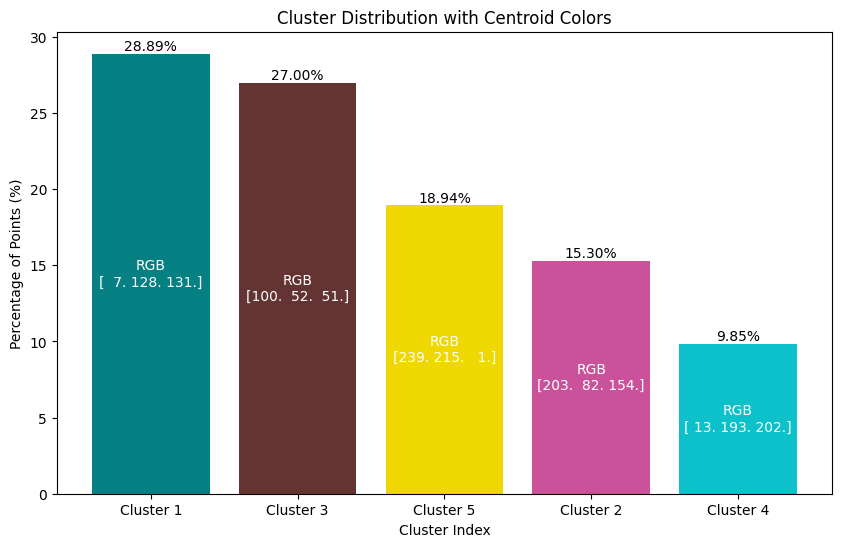

In [292]:
# Call the function to plot
plot_clusters_with_percentages(cluster_counts, centroid_colors, centroids)